In [145]:
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as rmse
from matplotlib import pyplot as plt


#Cargamos los modelos previamente guardados

In [146]:
svm_dia=joblib.load('models/svm_dia.pkl')
min_max_scaler_dia=joblib.load('models/scaler_dia.pkl')


#Carga de datos

In [147]:
val_dia=pd.read_excel("val_dia.xlsx")
train_dia=pd.read_excel("train_dia.xlsx")

In [148]:
## LabelEncoder

In [149]:
le = LabelEncoder()
le.fit(val_dia['BARRIO'].unique())
val_dia['BARRIO_ENCODER']=le.transform(val_dia['BARRIO'])
val_dia.head()
le = LabelEncoder()
le.fit(train_dia['BARRIO'].unique())
train_dia['BARRIO_ENCODER']=le.transform(train_dia['BARRIO'])

In [150]:
#obtener los vectores que se usaran
#########Vector que envian

In [151]:
X_val_dia = val_dia[['BARRIO_ENCODER','MES','ANIO','ESPECIAL']].values #Este es el vector que envian
y_val_dia = val_dia[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values
#X_train_dia = val_dia[['BARRIO_ENCODER','MES','ANIO','ESPECIAL']].values

#X_val_dia = min_max_scaler_dia.transform(X_val_dia) #agregar cuando el modelo este en la carpeta

#min_max_scaler_dia = preprocessing.MinMaxScaler() #borrar cuando el modelo este en la carpeta
#min_max_scaler_dia = min_max_scaler.fit(X_train_dia)#borrar si modelo en carpeta
X_val_dia = min_max_scaler_dia.transform(X_val_dia)
#joblib.dump(min_max_scaler_dia, 'models/min_max_scaler_dia.pkl')

['models/min_max_scaler_dia.pkl']

rmse: 0.18773704786204953


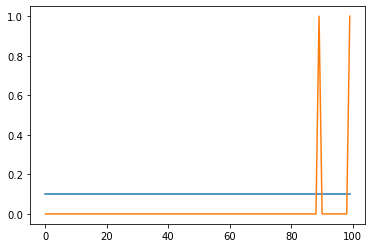

In [162]:
y_pred_dia = svm_dia.predict(X_val_dia)
print("rmse:",rmse(y_val_dia, y_pred_dia))
y_val_dia = pd.DataFrame(y_val_dia)
y_pred_dia = pd.DataFrame(y_pred_dia) ##esto es lo que se envia

plt.plot([i for i in range(100)],list(y_pred_dia[6])[0:100])
plt.plot([i for i in range(100)],list(y_val_dia[6])[0:100])

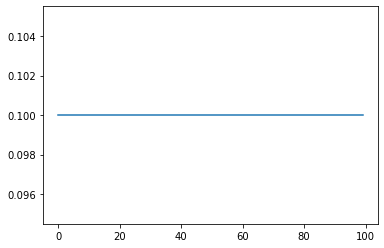

In [159]:
plt.plot([i for i in range(100)],list(y_pred_dia[5])[0:100])


In [154]:
y_pred_dia

,0,1,2,3,4,5,6
0,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
1,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
2,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
3,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
4,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
...,...,...,...,...,...,...,...
27301,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
27302,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
27303,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
27304,0.101395,0.10064,0.861571,0.0,0.1,0.100856,0.100997
